# Project - Happy Customer
**Name: Zimin Lee**

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import xgboost as xgb
from xgboost import plot_tree
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

**Background:**

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.


In [2]:
#Read File 
df = pd.read_csv("C:\\Users\\zzzim\\Desktop\\Apziva\\ACME-HappinessSurvey2020.csv", sep=',')
df.head(10)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


**Variable dictionary**:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers\
X1 = my order was delivered on time\
X2 = contents of my order was as I expected\
X3 = I ordered everything I wanted to order\
X4 = I paid a good price for my order\
X5 = I am satisfied with my courier\
X6 = the app makes ordering easy for me\
\
Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.


In [3]:
#Renaming columns to meaningful features
df = df.rename(columns={'Y': 'Happy','X1': 'DeliveredOnTime','X2': 'ExpectedContent','X3': 'DesiredOrder','X4': 'GoodPrice','X5': 'SatisfiedOrder','X6': 'EasyOrderProcess'})
df

,Happy,DeliveredOnTime,ExpectedContent,DesiredOrder,GoodPrice,SatisfiedOrder,EasyOrderProcess
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


## Predicting Happy Customer
A classification method is required to predict a customer is happy or not based on the feature. The classification method selected for this case is decision tree as there only consists of relatively small set of features (6) and little observations. 

**Goal(s):**

> Predict if a customer is happy or not based on the answers they give to questions asked.

**Success Metrics:**

> Reach 73% accuracy score or above.



### Decision Tree

In [87]:
rs=5
# one-hot encoding
df_ = pd.get_dummies(df)
    
# target/input split
y = df_['Happy']
X = df_.drop(['Happy'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = rs)

In [88]:
# simple decision tree training
clf = DecisionTreeClassifier(random_state=rs)

clf.fit(X_train_, y_train_)
print("Train accuracy:", clf.score(X_train_, y_train_))
print("Test accuracy:", clf.score(X_test_, y_test_))

Train accuracy: 0.9772727272727273
Test accuracy: 0.631578947368421


From the Accuracy of the decision tree above. This model has successfully predict whether a customer is happy with a accuracy of 97% on the training set and 61% on test set. There is a 34% difference in accuracy which suggest that the model is overfitted.\
To further improve this model, a grid search is used to find the optimal hyperparameter for this dataset. 

In [89]:
#Gridsearch 
from sklearn.model_selection import GridSearchCV

# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 15),
          'min_samples_leaf': range(0, 25, 1)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

result_set = cv_1.cv_results_
print(cv_1.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 9}


In [90]:
cv_1.fit(X_train, y_train)

print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.7009345794392523
Test accuracy: 0.6842105263157895


Overall the accuracy for test set have improved to 68%. The optimal hyperparameter resulted from the Gridsearch shows a Max depth of 1 and min sampleleaf of 15. The max depth of 1 siginifies that there no correlation between the features in classifying a customer happiness. This indicate that the tree is very interpretable and perhaps this set of features as a whole do not explain customer happiness well. \

A decision tree with XGBoost will be use to improve the accuracy.

#### Decision tree (XGBoost)

In [91]:
#XGBoost
import xgboost as xgb
from xgboost import plot_tree

#clf = xgb.XGBClassifier(use_label_encoder=False, n_estimators=10)
# casting labels as ints, as xgboost requires it
#clf.fit(X_train, y_train.astype(int))

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=rs)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

#print(confusion_matrix(y_test, y_pred))
print("Train accuracy:", xgb_model.score(X_train, y_train))
print("Test accuracy:", xgb_model.score(X_test, y_test))

Train accuracy: 0.9345794392523364
Test accuracy: 0.631578947368421


In [92]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=10,
    seed=rs
)

parameters = {
    'max_depth': range (1, 10, 1),
    'n_estimators': range(10, 100, 10),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'accuracy',
)

grid_search.fit(X_train, y_train)
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, nthread=10, num_parallel_tree=None,
              predictor=None, ...)

In [93]:
print("Train accuracy:", grid_search.score(X_train, y_train))
print("Test accuracy:", grid_search.score(X_test, y_test))

Train accuracy: 0.8691588785046729
Test accuracy: 0.5263157894736842


With XGBoost classifier, the performance have dropped to 53% after tuning the hyperparameters with Gridsearch. \

A Logistic Regression will be considered as Decision trees have not performed well for these set of features. 

### Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(X_train, y_train.values.ravel())

# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 0.6074766355140186
Test accuracy: 0.631578947368421


## Model Result

Based on the models (decision tree, tree(XGBoost), Logistic Regression) developed, it is clear the customer happiness havent been able to be predicted accurately with this set of dataset. The classifying models suggest that this set of features as a whole do not have much a strong predictive power in customer hapiness. This could be due to the insufficient sample size of the dataset. \

However, the best model as of now is the Decision Tree with Gridsearch hyperparameter with an accuracy of 68%.
The classification result can be seen below:

In [99]:
# training and test accuracy for DECISION TREE with GRIDSEARCH
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

# classification report on test data
y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.5887850467289719
Test accuracy: 0.6842105263157895
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.73      0.73      0.73        11

    accuracy                           0.68        19
   macro avg       0.68      0.68      0.68        19
weighted avg       0.68      0.68      0.68        19



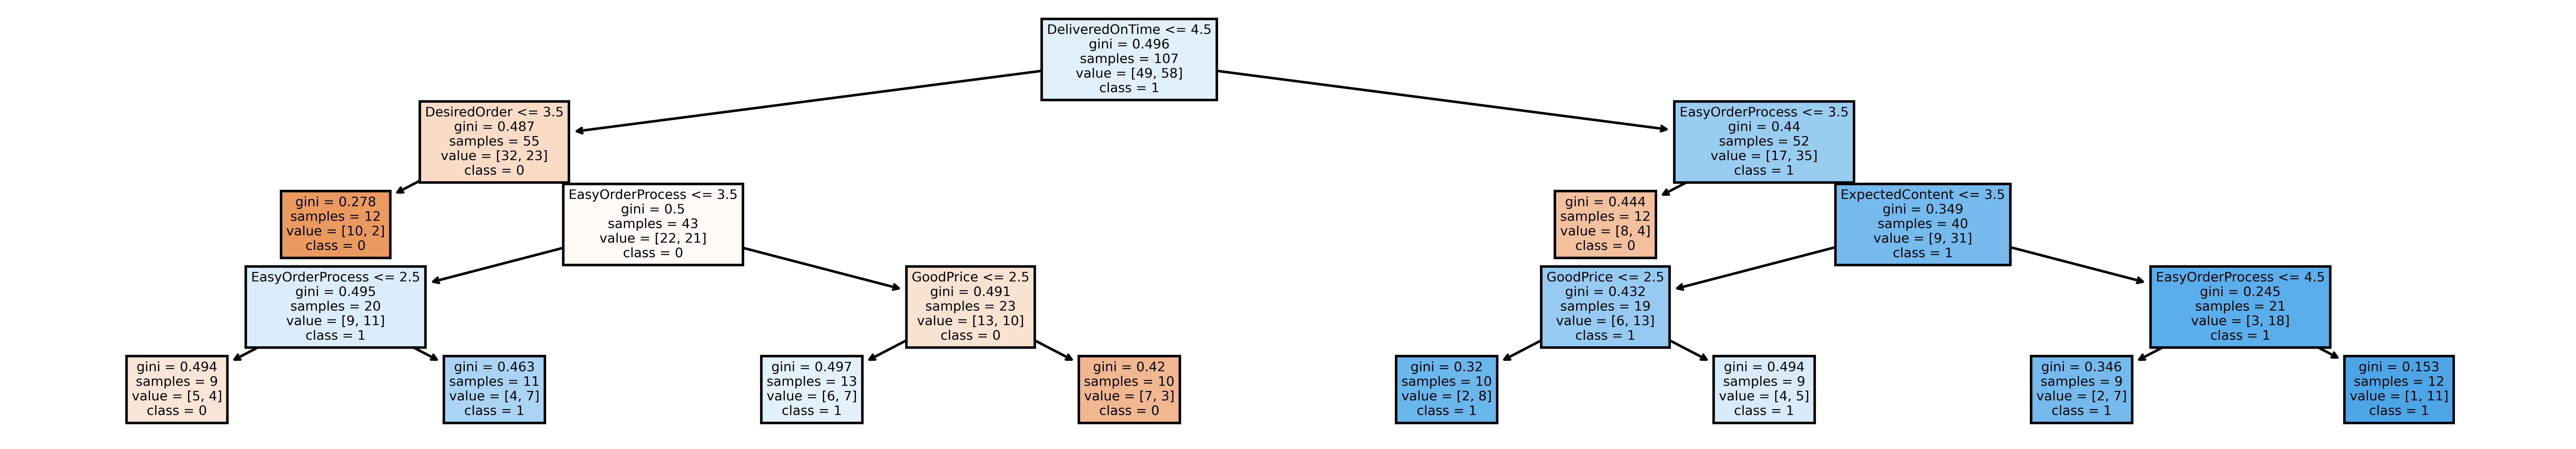

In [102]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (18,3), dpi=1000)
tree.plot_tree(cv_1.best_estimator_,
               feature_names = X.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

**Additional Information:**

The business is very interested in finding which questions/features are more important when predicting a customer’s happiness.

> Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

### Feature Importance

In [98]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


# translate rows to dicts
def row_to_dict(X, y=None):
    return X.apply(dict, axis=1)

# define prediction model
ft = FunctionTransformer(row_to_dict, validate=False)
dv = DictVectorizer()
clf = DecisionTreeClassifier(random_state=rs)

# glue steps together
model = make_pipeline(ft, dv, cv_1)

# train
model.fit(X_train, y_train)

# get feature importances
feature_importances = zip(dv.feature_names_, cv_1.best_estimator_.feature_importances_)

sorted_feature = []
for i in list(feature_importances):
    sorted_feature.append(i)

sorted_feature.sort(key = lambda row: row[1], reverse=True)
for i in sorted_feature:
    print (i)

('SatisfiedOrder', 0.381210666644043)
('DeliveredOnTime', 0.297645844453119)
('EasyOrderProcess', 0.16641725827000056)
('ExpectedContent', 0.10359810493870732)
('DesiredOrder', 0.05112812569413008)
('GoodPrice', 0.0)


In descending order, the top 3 important feature for this model are SatisfiedOrder(X5), DeliveredOnTime(X2) and EasyOrderProcess(X3).\
EasyOrderProcess(X6) is the least important feature with no explainability and can be excluded to ease the survey experience.